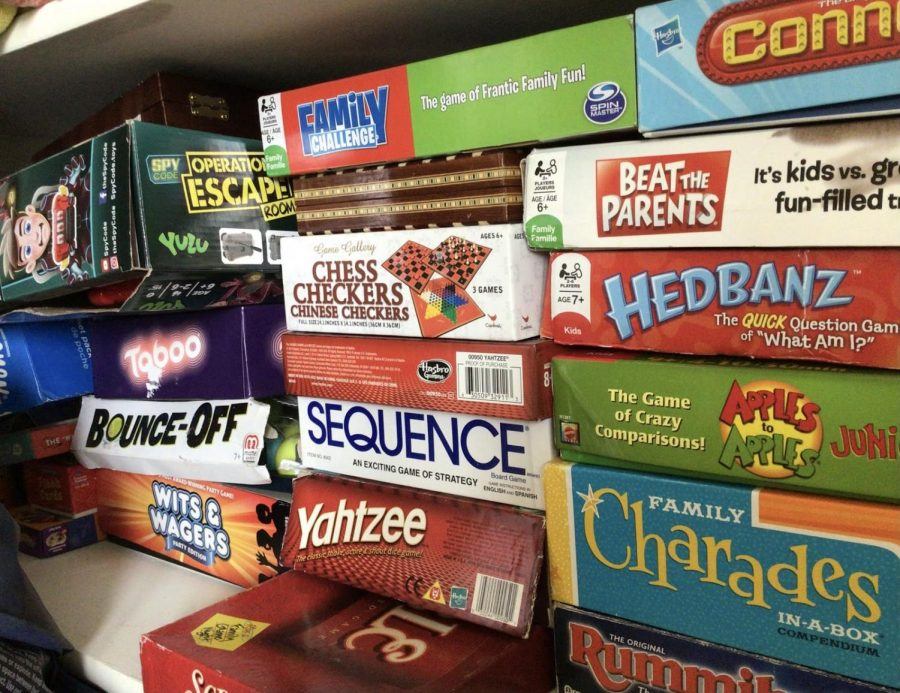

# Boardgames Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

###########################################################################################################################

## Loading data and Initial EDA:

In [2]:
brdg_df = pd.read_csv("boardgames1.csv")

In [3]:
brdg_df.columns

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'label', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamedesigner',
       'boardgameartist', 'boardgamepublisher', 'boardgamehonor',
       'boardgamecategory', 'boardgameversion', 'boardgamemechanic',
       'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink'],
      dtype='object')

- Renamed few columns for clarity and future analysis:

In [4]:
brdg_df.columns = brdg_df.columns.str.replace("baverage","geek_rating")
brdg_df.columns = brdg_df.columns.str.replace("average","average_rating")
brdg_df.columns = brdg_df.columns.str.replace("boardgamehonor_cnt","award_counts")
brdg_df.columns = brdg_df.columns.str.replace("news","BGG_news")
brdg_df.columns = brdg_df.columns.str.replace("blogs","BGG_blogs")

- Displaying column names of the dataset and first few rows of the data:

In [5]:
# brdg_df.columns

In [6]:
# brdg_df.head(10)

- Basic numerical EDA:

In [7]:
#brdg_df.describe()

- Correlation for all numerical data columns of interest:

In [8]:
# brdg_df.corr().head(20)

- Creating a categories column for different geek ratings:

In [9]:
brdg_df["geek_rating_category"] = brdg_df["geek_rating"]\
            .apply(lambda x: "Geek rating > 7" if x >=7\
                   else "Geek rating > 6 and < 7" if x<7 and x>=6\
                   else "Geek rating > 5 and < 6" if x<6 and x>=5\
                   else "Geek rating < 5")

In [10]:
brdg_df["geek_rating_category"].value_counts(normalize=True)

Geek rating > 5 and < 6    0.81125
Geek rating > 6 and < 7    0.09885
Geek rating < 5            0.07160
Geek rating > 7            0.01830
Name: geek_rating_category, dtype: float64

- Creating a categories column for different site views:

In [11]:
brdg_df["site_views_category"] = brdg_df["siteviews"]\
            .apply(lambda x: "Site Views > 25K" if x >=25000\
                   else "Site Views < 25K")

In [12]:
brdg_df["site_views_category"].value_counts()

Site Views < 25K    10396
Site Views > 25K     9604
Name: site_views_category, dtype: int64

In [13]:
brdg_df.columns

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average_rating', 'geek_rating', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'BGG_news', 'BGG_blogs',
       'weblink', 'podcast', 'label', 'boardgamedesigner_cnt',
       'boardgameartist_cnt', 'boardgamepublisher_cnt', 'award_counts',
       'boardgamecategory_cnt', 'boardgamemechanic_cnt',
       'boardgameexpansion_cnt', 'boardgameversion_cnt', 'boardgamefamily_cnt',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher',
       'boardgamehonor', 'boardgamecategory', 'boardgameversion',
       'boardgamemechanic', 'boardgameexpansion', 'boardgamefamily',
       'description', 'gamelink', 'geek_rating_category',
       'site

###########################################################################################################################

## Evaluating geek ratings for all games:

- Displaying ratings density plot:

Text(0, 0.5, 'Density \n')

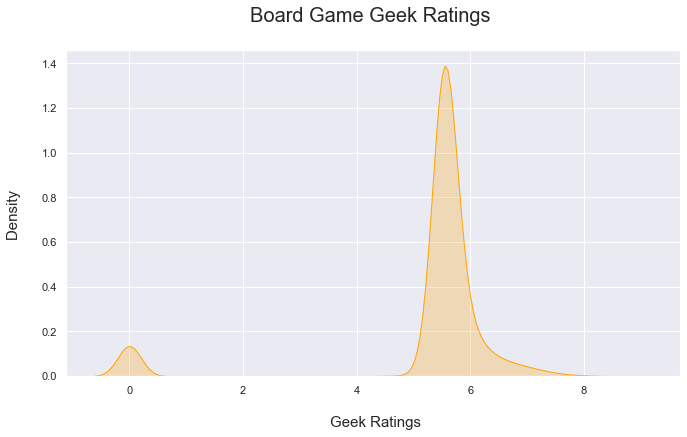

In [14]:
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(brdg_df["geek_rating"], shade = True, color="orange").set_title("Board Game Geek Ratings \n",fontsize = 20)
plt.xlabel("\n Geek Ratings", fontsize = 15)
plt.ylabel("Density \n", fontsize = 15)

- Displaying histogram of game counts per rating category:

Text(0.5, 1.0, 'Histogram of Geek Ratings by categories \n')

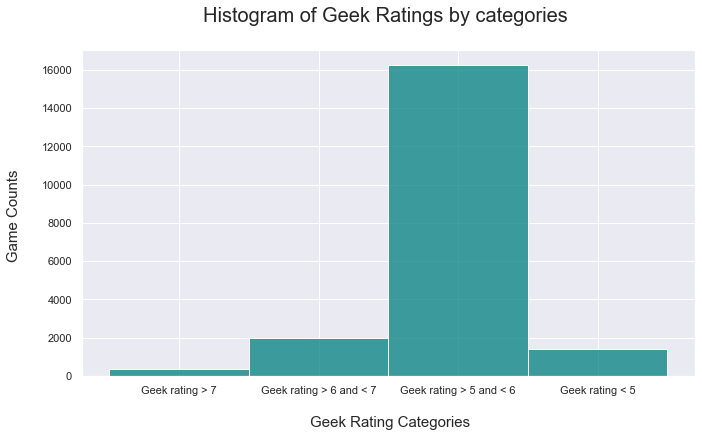

In [15]:
sns.histplot(brdg_df["geek_rating_category"], color = "teal")
plt.xlabel("\n Geek Rating Categories",fontsize = 15)
plt.ylabel("Game Counts \n",fontsize = 15)
plt.title("Histogram of Geek Ratings by categories \n", fontsize = 20)

###########################################################################################################################

## Evaluation of 150 highest rated boardgames and site views:

- Top 150 board games sorted by game geek ratings:

In [16]:
rating_views_top = brdg_df[["name","geek_rating","siteviews"]]\
        .sort_values("geek_rating",ascending=False).head(150)
rating_views_top

,name,geek_rating,siteviews
0,Gloomhaven,8.58424,8933078
1,Pandemic Legacy Season 1,8.47159,2971746
2,Terraforming Mars,8.26781,4724387
3,Through the Ages A New Story of Civilization,8.23513,2448074
4,Brass Birmingham,8.20459,894621
...,...,...,...
144,\u062c\u0648\u0627\u0647\u0631\u064a,7.35206,1730330
145,Goa A New Expedition,7.34947,873752
146,Tichu,7.34824,802488
147,Detective A Modern Crime Board Game,7.34381,490214


In [17]:
rating_views_top.describe()

,geek_rating,siteviews
count,150.000000,1.500000e+02
mean,7.624845,1.661943e+06
std,0.254136,1.228917e+06
min,7.342780,2.738540e+05
25%,7.426147,8.451090e+05
50%,7.556870,1.255121e+06
75%,7.768045,2.044964e+06
max,8.584240,8.933078e+06


- Correlation between geek ratings and site views:

In [18]:
rating_views_top.corr()

,geek_rating,siteviews
geek_rating,1.00000,0.60716
siteviews,0.60716,1.00000


- Distribution of geek ratings for top 150 games:

Text(0, 0.5, 'Density')

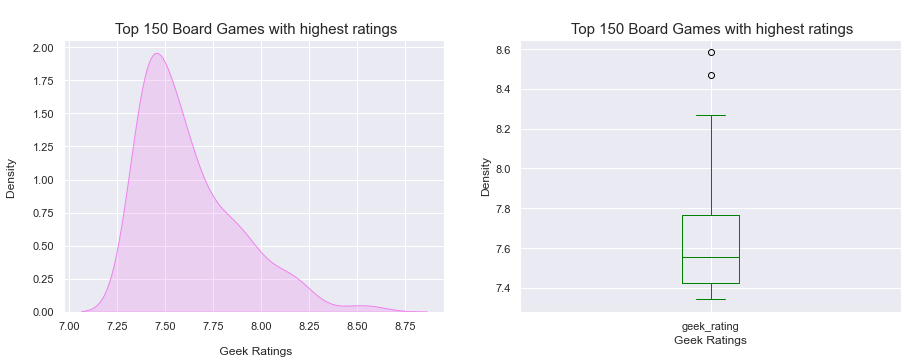

In [19]:
plt.figure(2)

plt.subplot(121)
sns.kdeplot(rating_views_top["geek_rating"], color="violet",shade = True)\
                    .set_title("\n Top 150 Board Games with highest ratings", fontsize = 15)
plt.xlabel("\n Geek Ratings", fontsize = 12)
plt.ylabel("Density \n", fontsize = 12)

plt.subplot(122)
rating_views_top["geek_rating"].plot.box(figsize=(15,5), color = "green").set_title("\n Top 150 Board Games with highest ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

- Trend showing relation between site views and geek ratings for top 150 games:

Text(0.5, 1.0, 'Top 150 games: Site Views vs. Geek Ratings \n')

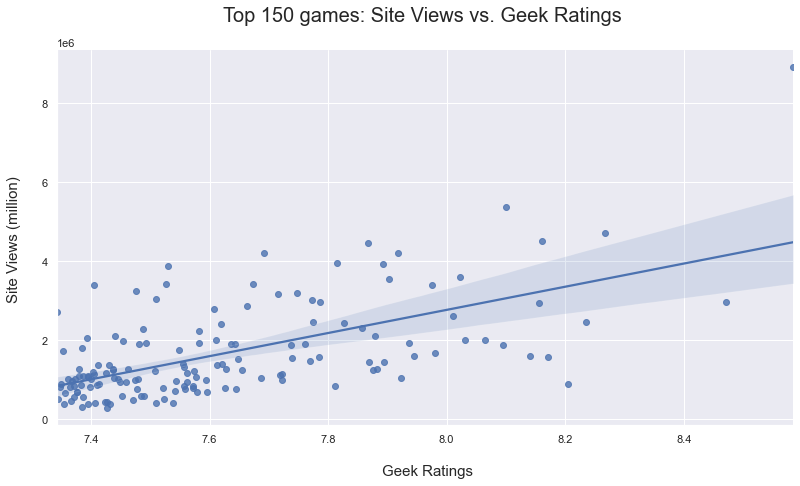

In [20]:
sns.lmplot("geek_rating", "siteviews", rating_views_top, height=6, aspect=1.8)
plt.xlabel("\n Geek Ratings", fontsize = 15)
plt.ylabel("Site Views (million) \n", fontsize = 15)
plt.title("Top 150 games: Site Views vs. Geek Ratings \n", fontsize = 20)

### Evaluation of 150 lowest rated boardgames and site views:

- Bottom 150 board games sorted by game geek ratings:

In [21]:
rating_views_bottom = brdg_df[["name","geek_rating","siteviews"]]\
        .sort_values("geek_rating",ascending=False)\
        .loc[brdg_df.geek_rating > 0,:].tail(150)
rating_views_bottom

,name,geek_rating,siteviews
18261,Go To The Top Of The Class,5.33274,67126
18262,Feed the Kitty,5.33239,27893
18263,Pass the Pigs,5.33201,248338
18264,Fallen City of Karez,5.33149,140708
18265,Trivial Pursuit 20th Anniversary Edition,5.33024,66814
...,...,...,...
18406,War,3.98527,53095
18407,Bingo,3.89746,45273
18408,Candy Land The Disney Theme Park Edition,3.77222,285110
18409,Chutes and Ladders,3.58867,226580


In [22]:
rating_views_bottom.describe()

,geek_rating,siteviews
count,150.000000,1.500000e+02
mean,5.077048,1.399950e+05
std,0.349820,4.432717e+05
min,3.506730,8.410000e+03
25%,5.004008,4.027025e+04
50%,5.219855,6.750250e+04
75%,5.296655,1.199375e+05
max,5.332740,5.349478e+06


- Correlation between geek ratings and site views:

In [23]:
rating_views_bottom.corr()

,geek_rating,siteviews
geek_rating,1.000000,-0.252535
siteviews,-0.252535,1.000000


- Distribution of geek ratings for bottom 150 games:

Text(0, 0.5, 'Density')

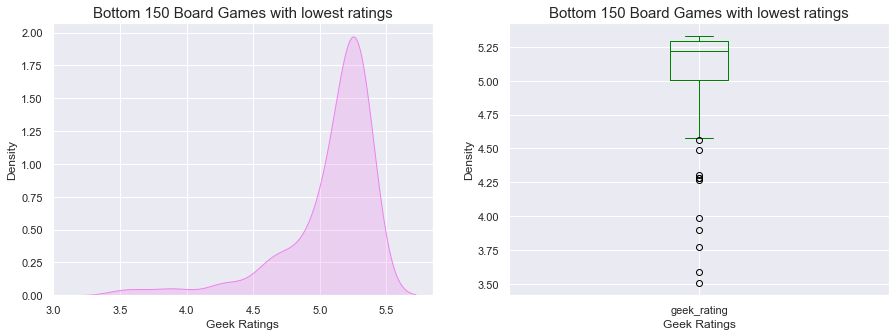

In [24]:
plt.figure(2)

plt.subplot(121)
sns.kdeplot(rating_views_bottom["geek_rating"],color="violet",shade = True)\
            .set_title("Bottom 150 Board Games with lowest ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 12)
plt.ylabel("Density", fontsize = 12)


plt.subplot(122)
rating_views_bottom["geek_rating"].plot.box(figsize=(15,5), color = "green").set_title("Bottom 150 Board Games with lowest ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

- Trend showing relation between site views and geek ratings for bottom 150 games:

Text(0.5, 1.0, 'Bottom 150 games: Site Views vs. Geek Ratings \n')

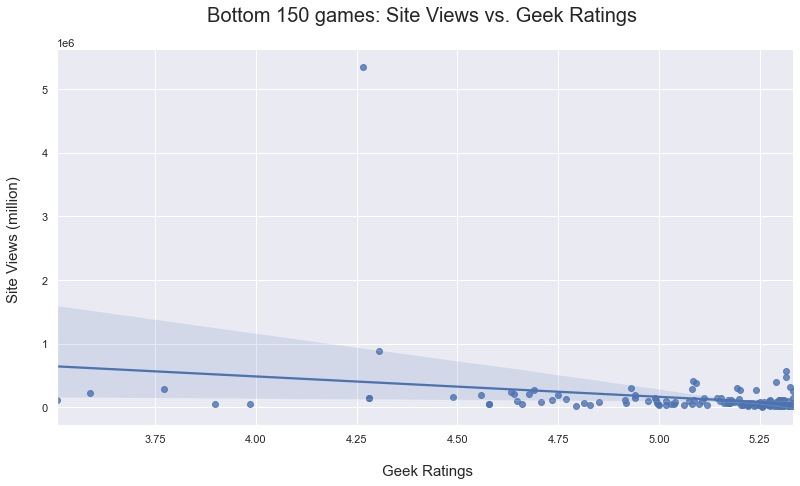

In [25]:
sns.lmplot("geek_rating", "siteviews", rating_views_bottom, height=6, aspect=1.8)
plt.xlabel("\n Geek Ratings", fontsize = 15)
plt.ylabel("Site Views (million) \n", fontsize = 15)
plt.title("Bottom 150 games: Site Views vs. Geek Ratings \n", fontsize = 20)

- Trend showing relation between site views and geek ratings for all games:

Text(0.5, 1.0, 'Overall trend depicting site views and geek ratings \n')

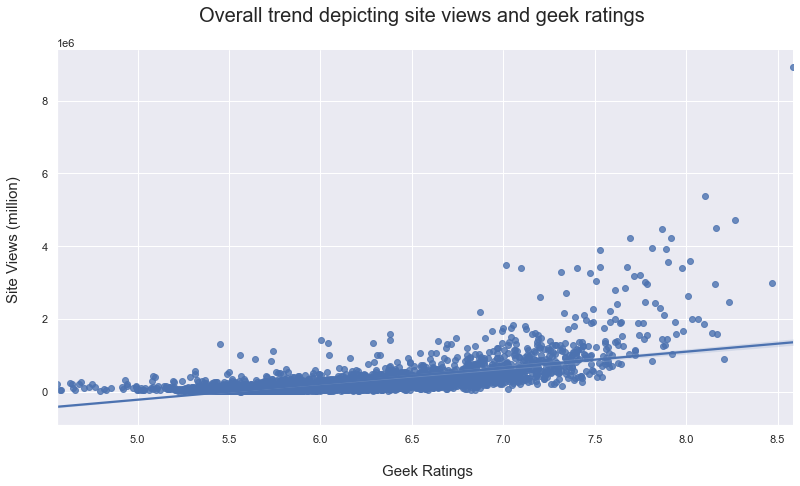

In [26]:
sns.lmplot("geek_rating", "siteviews", brdg_df.loc[brdg_df.geek_rating > 4.5,:], height=6, aspect=1.8)
plt.xlabel("\n Geek Ratings", fontsize = 15)
plt.ylabel("Site Views (million) \n", fontsize = 15)
plt.title("Overall trend depicting site views and geek ratings \n", fontsize = 20)

###########################################################################################################################

## Evaluating geek ratings vs game awards:

- Board games displayed whose ratings are > 0 and award counts are > 0:

In [27]:
honor_df = brdg_df[["name","geek_rating","geek_rating_category","award_counts"]]\
                .sort_values("geek_rating",ascending=False)\
                .loc[(brdg_df.geek_rating > 0) & (brdg_df.award_counts > 0)]

In [28]:
honor_df.describe()

,geek_rating,award_counts
count,3498.000000,3498.000000
mean,6.050853,2.485992
std,0.595030,3.117094
min,4.931720,1.000000
25%,5.569840,1.000000
50%,5.818320,1.000000
75%,6.407077,3.000000
max,8.584240,50.000000


- Correlation between geek ratings and award counts:

In [29]:
honor_df.corr()

,geek_rating,award_counts
geek_rating,1.000000,0.566378
award_counts,0.566378,1.000000


### Number of awards for top and bottom 20 board games (sorted by rating):

In [30]:
top_20 = honor_df.head(20)
top_20 = top_20.sort_values(by='award_counts',ascending=True)

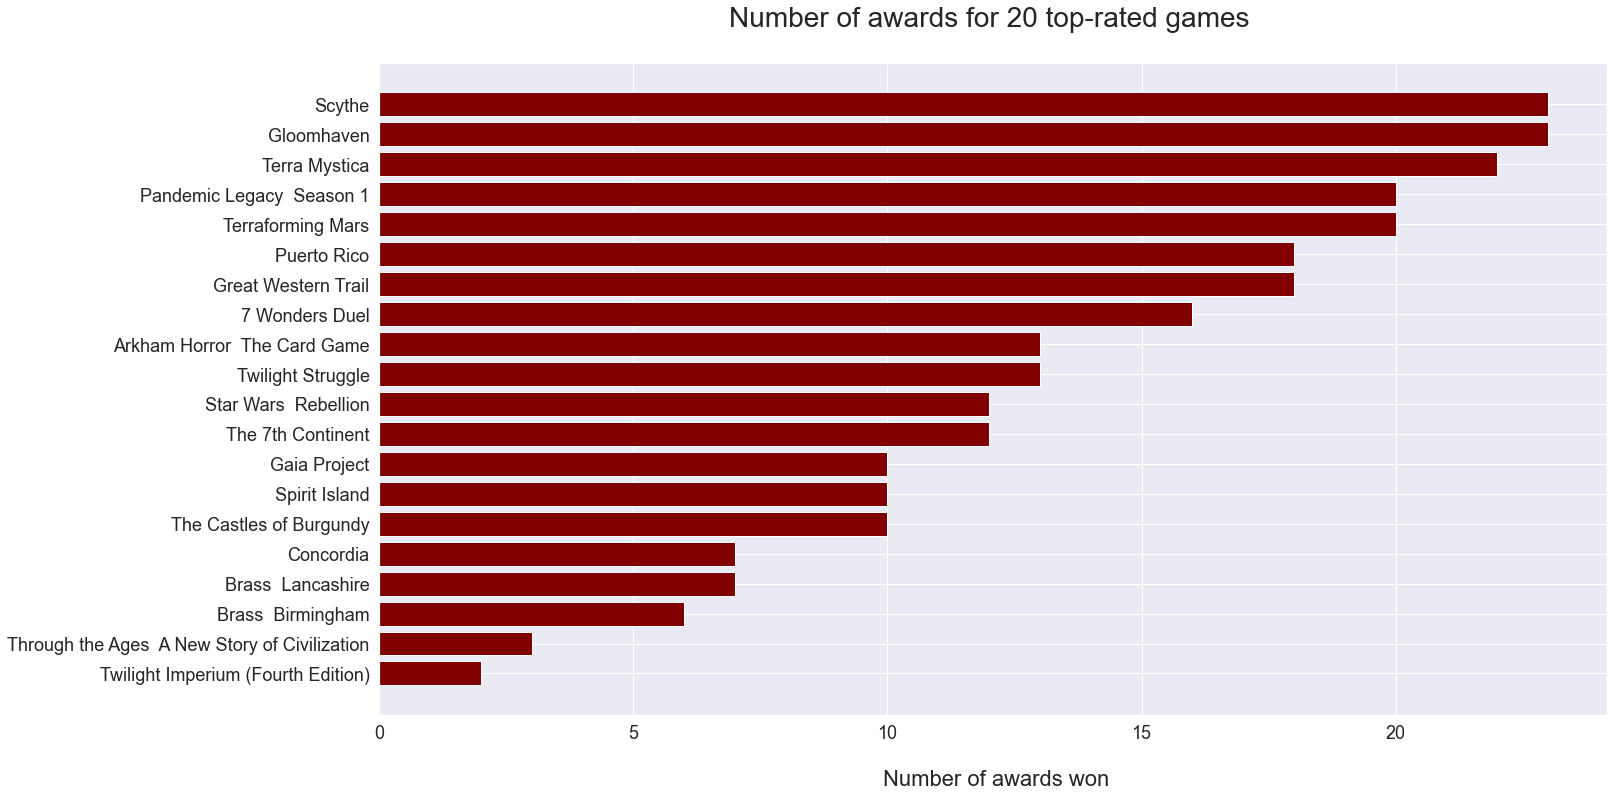

In [31]:
plt.figure(figsize = (22,12))
plt.barh(top_20.name, top_20.award_counts, color ="maroon")
plt.xlabel("\n Number of awards won", fontsize = 22)
plt.title("Number of awards for 20 top-rated games \n", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [32]:
bottom_20 = honor_df.tail(20)
bottom_20 = bottom_20.sort_values(by='award_counts',ascending=True)

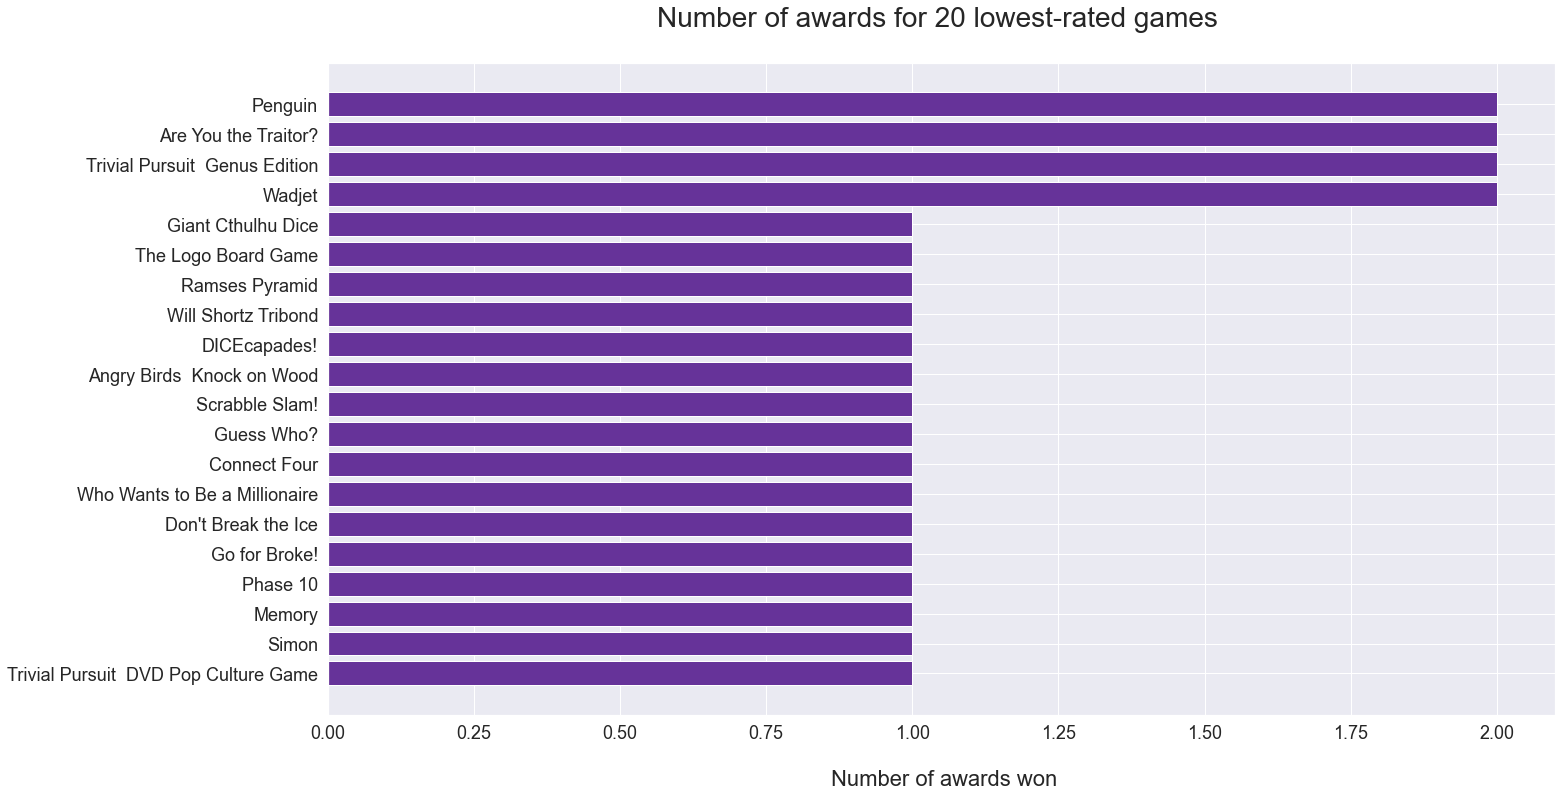

In [33]:
plt.figure(figsize = (22,12))
plt.barh(bottom_20.name, bottom_20.award_counts, color ="rebeccapurple")
plt.xlabel("\n Number of awards won", fontsize = 22)
plt.title("Number of awards for 20 lowest-rated games \n", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

### Plotting average award counts for each geek rating category :

In [34]:
award_df = pd.DataFrame(honor_df.groupby("geek_rating_category")["award_counts"].mean()).reset_index()
award_df

,geek_rating_category,award_counts
0,Geek rating < 5,1.000000
1,Geek rating > 5 and < 6,1.506737
2,Geek rating > 6 and < 7,2.837764
3,Geek rating > 7,7.564417


Text(0.5, 1.0, 'Average award counts for games in different rating categories \n')

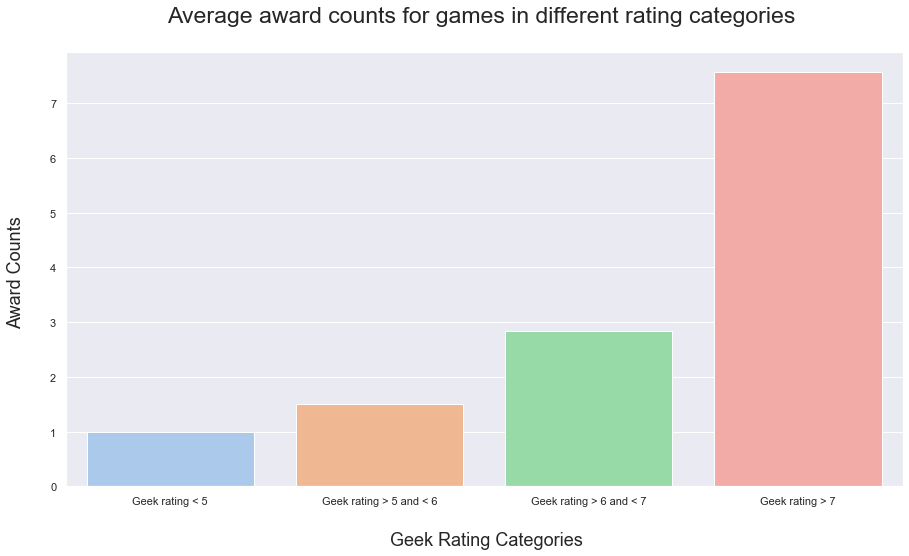

In [35]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "geek_rating_category", y = "award_counts", data = award_df, errwidth=0, palette='pastel')
plt.xlabel("\n Geek Rating Categories", fontsize = 18)
plt.ylabel("Award Counts \n", fontsize = 18)
plt.title("Average award counts for games in different rating categories \n", fontsize = 23)

###########################################################################################################################

### Evaluating geek ratings vs site views:

- Histogram of game site views:

Text(0.5, 1.0, 'Game Site Views')

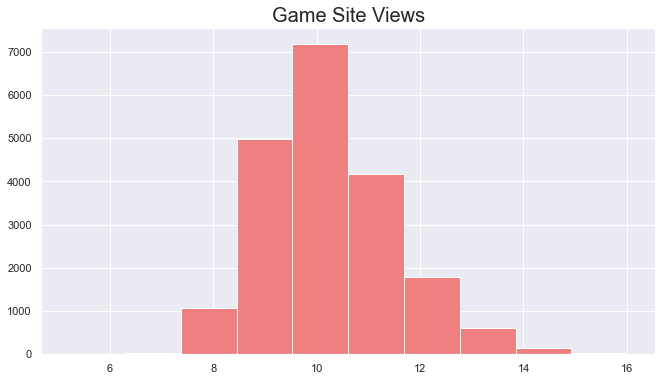

In [36]:
plt.hist(np.log(brdg_df['siteviews']), color = "lightcoral")
plt.title('Game Site Views', fontsize = 20)

- Site views per rating category:

In [37]:
siteviews_df = pd.DataFrame(brdg_df.groupby('geek_rating_category')["siteviews"].median()).reset_index()
siteviews_df

,geek_rating_category,siteviews
0,Geek rating < 5,6863.5
1,Geek rating > 5 and < 6,21989.0
2,Geek rating > 6 and < 7,190586.0
3,Geek rating > 7,863421.0


Text(0.5, 1.0, 'Median of site views for different rating categories \n')

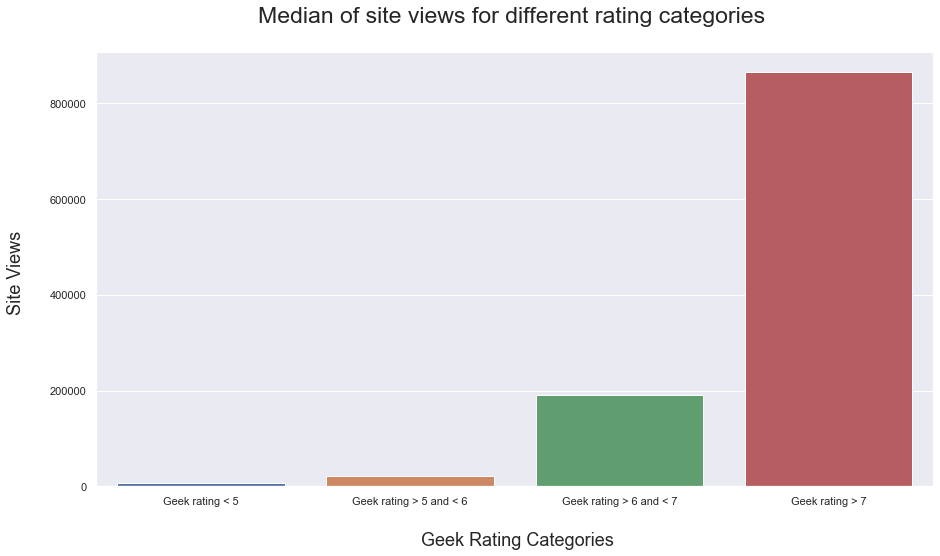

In [69]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "geek_rating_category", y = "siteviews", data = siteviews_df, errwidth=0)
plt.xlabel('\n Geek Rating Categories', fontsize = 18)
plt.ylabel('Site Views \n', fontsize = 18)
plt.title('Median of site views for different rating categories \n', fontsize = 23)

###########################################################################################################################

### Evaluating site views vs different media types:

- Selected outside media counts and compared with siteviews for each rating category:

In [40]:
media_df = brdg_df[["geek_rating","geek_rating_category","siteviews","podcast","weblink"]]\
                   .loc[brdg_df.geek_rating > 0,:]\
                   .loc[brdg_df.siteviews < 6.0e+6,:]\
                   .loc[((brdg_df.podcast > 0) & (brdg_df.podcast < 500)) & (brdg_df.weblink > 0)]

In [41]:
media_df

,geek_rating,geek_rating_category,siteviews,podcast,weblink
1,8.47159,Geek rating > 7,2971746,164,69
2,8.26781,Geek rating > 7,4724387,148,60
3,8.23513,Geek rating > 7,2448074,42,30
4,8.20459,Geek rating > 7,894621,21,13
5,8.17076,Geek rating > 7,1573904,44,20
...,...,...,...,...,...
19140,5.86353,Geek rating > 5 and < 6,71029,1,4
19141,5.73489,Geek rating > 5 and < 6,62725,1,3
19429,6.17089,Geek rating > 6 and < 7,112729,1,12
19585,5.59398,Geek rating > 5 and < 6,31075,1,3


- Correlation between outside media counts and siteviews:

In [42]:
media_df[["siteviews","podcast","weblink"]].corr()

,siteviews,podcast,weblink
siteviews,1.000000,0.786209,0.683638
podcast,0.786209,1.000000,0.618982
weblink,0.683638,0.618982,1.000000


- Trend showing relation between site views and podcasts about the game:

Text(0.5, 1.0, 'Podcast Counts vs. Site Views \n')

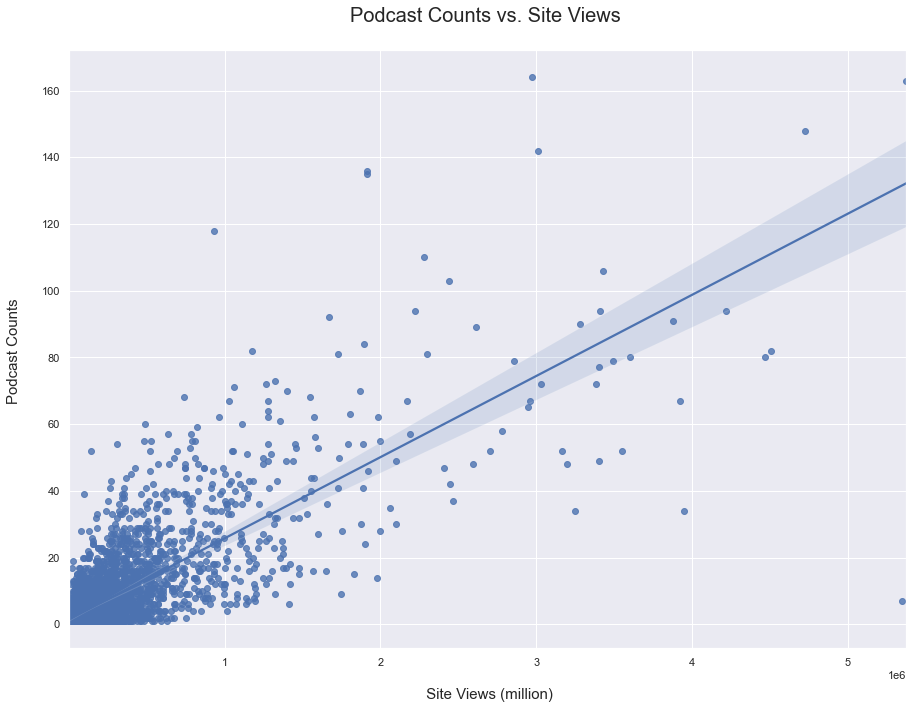

In [70]:
sns.set(rc={"figure.figsize":(15, 11)})
sns.regplot(x=media_df["siteviews"], y=media_df["podcast"])
plt.xlabel("\n Site Views (million)", fontsize = 15)
plt.ylabel("Podcast Counts \n", fontsize = 15)
plt.title("Podcast Counts vs. Site Views \n", fontsize = 20)

- Trend showing relation between site views and weblinks for different online media articles about the game:

Text(0.5, 1.0, 'Weblink Counts vs. Site Views \n')

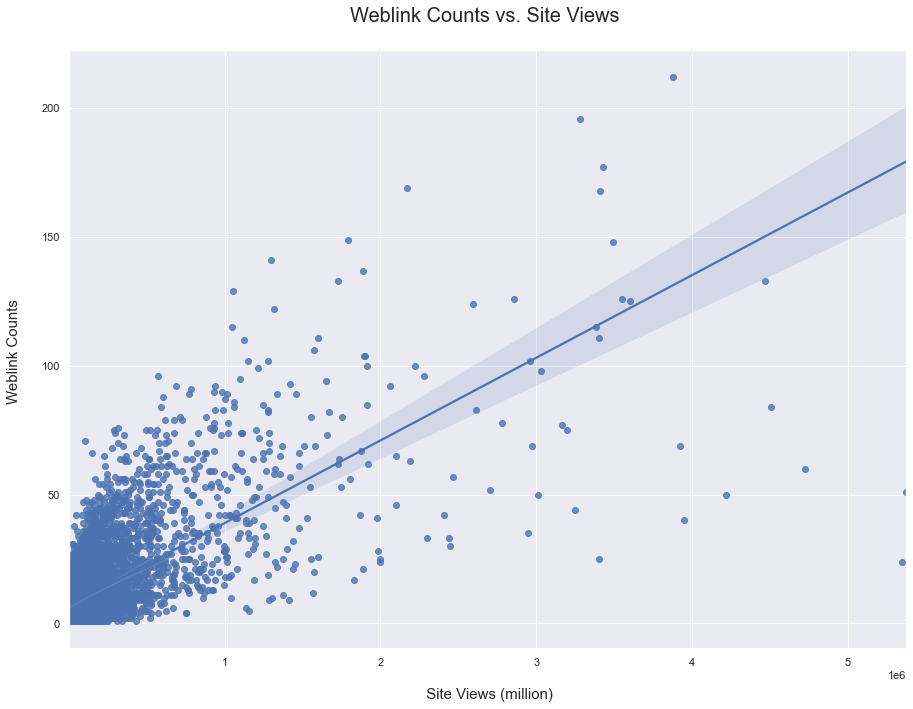

In [71]:
sns.set(rc={"figure.figsize":(15, 11)})
sns.regplot(x=media_df["siteviews"], y=media_df["weblink"])
plt.xlabel("\n Site Views (million)", fontsize = 15)
plt.ylabel("Weblink Counts \n", fontsize = 15)
plt.title("Weblink Counts vs. Site Views \n", fontsize = 20)

- Selected BGG media counts and compared with siteviews for each rating category:

In [45]:
bgg_site_df = brdg_df[["geek_rating","geek_rating_category","siteviews","BGG_news","BGG_blogs"]]\
                    .loc[brdg_df.geek_rating > 0,:]\
                    .loc[brdg_df.siteviews < 6.0e+6,:]\
                    .loc[(brdg_df.BGG_news > 0) & (brdg_df.BGG_blogs > 0)]

In [46]:
bgg_site_df

,geek_rating,geek_rating_category,siteviews,BGG_news,BGG_blogs
1,8.47159,Geek rating > 7,2971746,9,597
2,8.26781,Geek rating > 7,4724387,14,1158
3,8.23513,Geek rating > 7,2448074,5,185
4,8.20459,Geek rating > 7,894621,3,124
5,8.17076,Geek rating > 7,1573904,2,67
...,...,...,...,...,...
19105,5.88896,Geek rating > 5 and < 6,34325,1,2
19140,5.86353,Geek rating > 5 and < 6,71029,1,1
19141,5.73489,Geek rating > 5 and < 6,62725,2,1
19424,5.53021,Geek rating > 5 and < 6,14565,1,3


- Correlation between BGG media counts and siteviews:

In [47]:
bgg_site_df[["siteviews","BGG_news","BGG_blogs"]].corr()

,siteviews,BGG_news,BGG_blogs
siteviews,1.000000,0.509123,0.805586
BGG_news,0.509123,1.000000,0.635450
BGG_blogs,0.805586,0.635450,1.000000


- Trend showing relation between site views and BGG written articles about the game (posted on game page on BGG website):

Text(0.5, 1.0, 'BGG News Articles vs. Site Views \n')

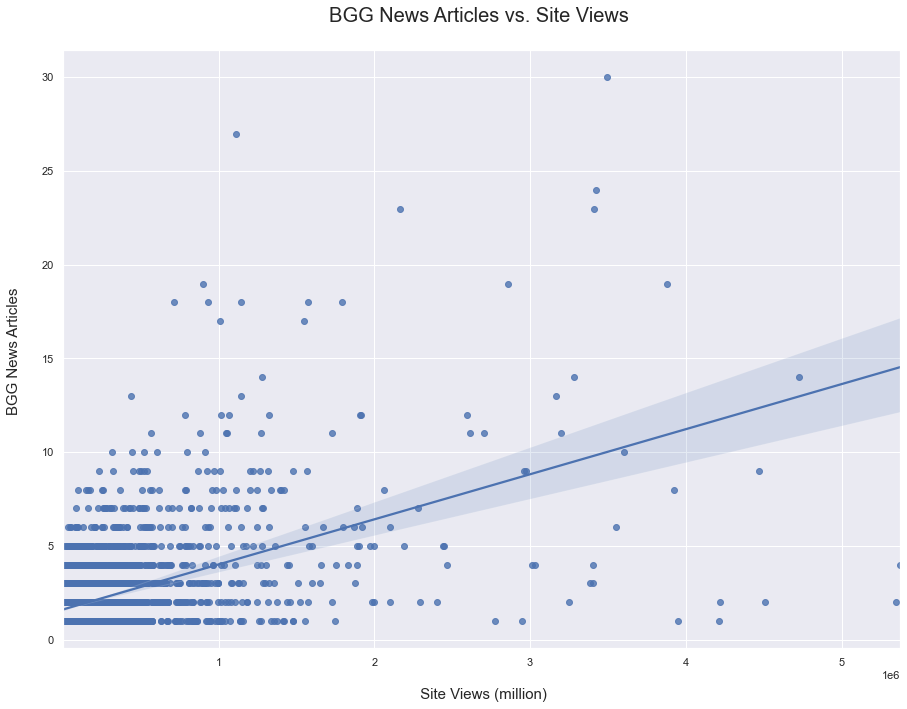

In [72]:
sns.set(rc={"figure.figsize":(15, 11)})
sns.regplot(x=bgg_site_df["siteviews"], y=bgg_site_df["BGG_news"])
plt.xlabel("\n Site Views (million)", fontsize = 15)
plt.ylabel("BGG News Articles \n", fontsize = 15)
plt.title("BGG News Articles vs. Site Views \n", fontsize = 20)

Text(0.5, 1.0, 'BGG Blog Posts vs. Site Views \n')

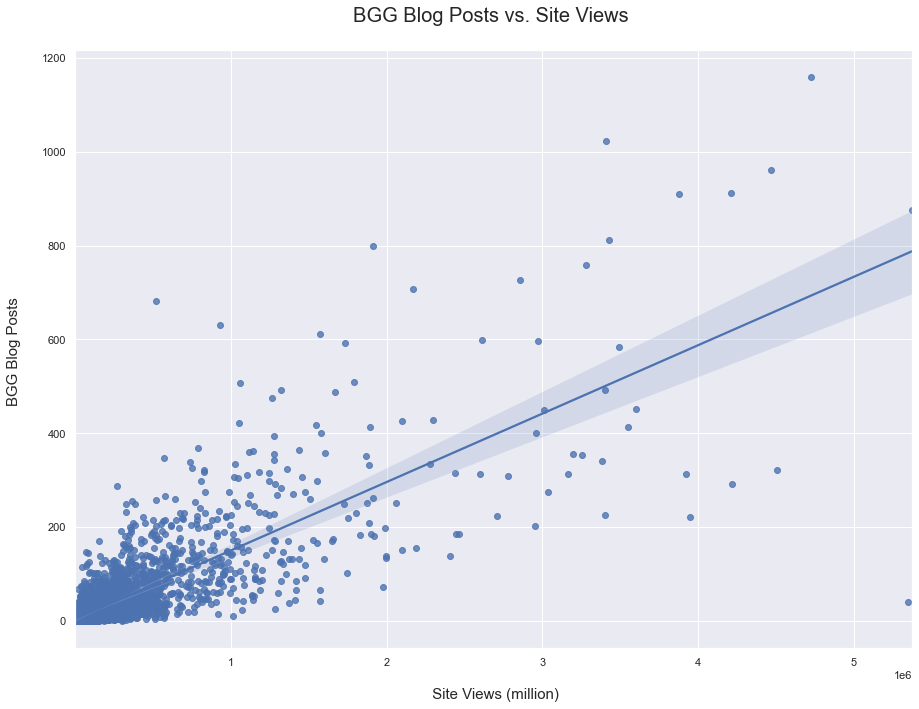

In [73]:
sns.set(rc={"figure.figsize":(15, 11)})
sns.regplot(x=bgg_site_df["siteviews"], y=bgg_site_df["BGG_blogs"])
plt.xlabel("\n Site Views (million)", fontsize = 15)
plt.ylabel("BGG Blog Posts \n", fontsize = 15)
plt.title("BGG Blog Posts vs. Site Views \n", fontsize = 20)

###########################################################################################################################

## Evaluating minimum playing time for games per category:

- Two categories were choosen for this evaluation, Geek rating > 6 and < 7 and Geek rating > 7

In [50]:
minplaytime_df = brdg_df[["geek_rating_category","minplaytime",]]\
                             .groupby(["geek_rating_category","minplaytime"])\
                             .size().reset_index(name="No. of games")

- Bar graphs displaying how many games had highest percentage of certain minimum playing time:

Text(0.5, 1.0, 'Geek Rating > 6 and < 7')

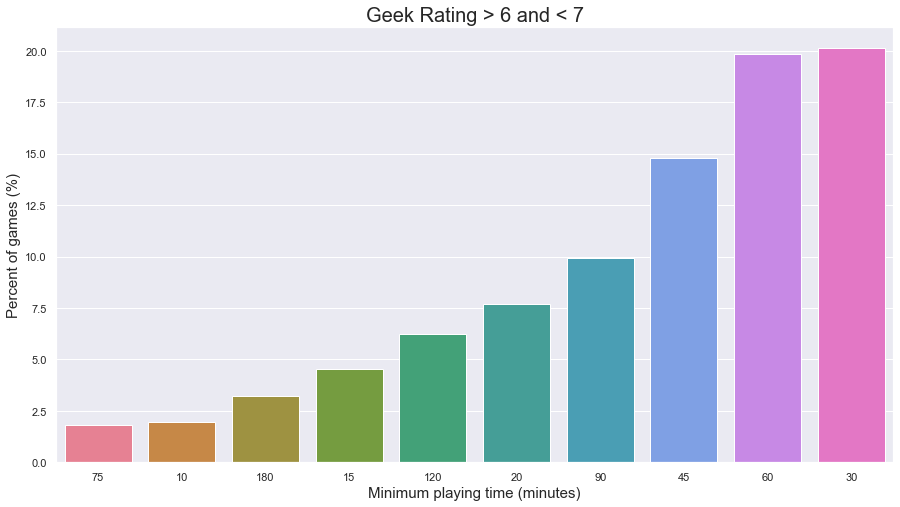

In [51]:
minplaytime_6_7 = minplaytime_df.loc[minplaytime_df["geek_rating_category"] == "Geek rating > 6 and < 7"]\
                     .sort_values(by="No. of games")

minplaytime_6_7["percent_of_games"] = (minplaytime_6_7["No. of games"]/sum(minplaytime_6_7["No. of games"]))*100
minplaytime_6_7 = minplaytime_6_7.tail(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "minplaytime", y = "percent_of_games", data = minplaytime_6_7, order=minplaytime_6_7\
            .sort_values("percent_of_games").minplaytime, palette= "husl")

plt.xlabel("Minimum playing time (minutes)", fontsize = 15)
plt.ylabel("Percent of games (%)", fontsize = 15)
plt.title("Geek Rating > 6 and < 7", fontsize = 20)

Text(0.5, 1.0, 'Geek Rating > 7')

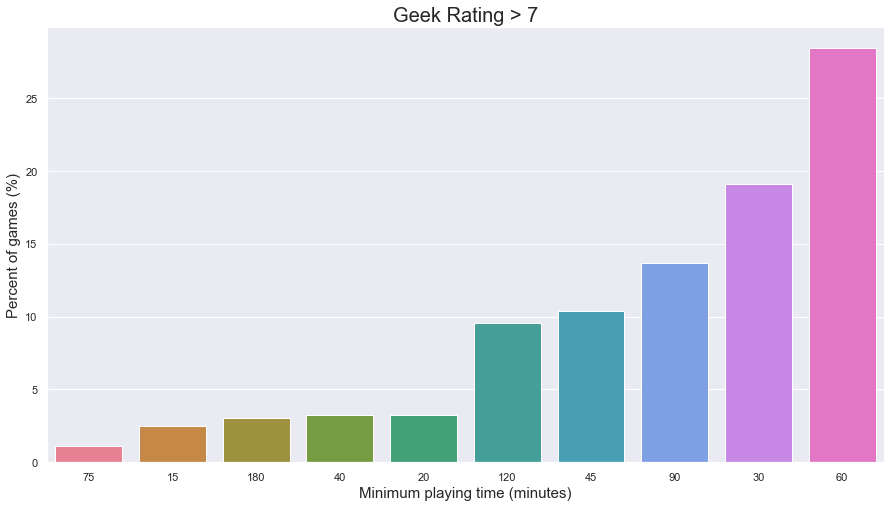

In [52]:
minplaytime_7 = minplaytime_df.loc[minplaytime_df["geek_rating_category"] == "Geek rating > 7"]\
                     .sort_values(by="No. of games")

minplaytime_7["percent_of_games"] = (minplaytime_7["No. of games"]/sum(minplaytime_7["No. of games"]))*100
minplaytime_7 = minplaytime_7.tail(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "minplaytime", y = "percent_of_games", data = minplaytime_7, order=minplaytime_7\
            .sort_values("percent_of_games").minplaytime, palette= "husl")

plt.xlabel("Minimum playing time (minutes)", fontsize = 15)
plt.ylabel("Percent of games (%)", fontsize = 15)
plt.title("Geek Rating > 7", fontsize = 20)

## Evaluating maximum playing time for games per category:

- Two categories were choosen for this evaluation, Geek rating > 6 and < 7 and Geek rating > 7

In [53]:
maxplaytime_df = brdg_df[["geek_rating_category","maxplaytime",]]\
                             .groupby(["geek_rating_category","maxplaytime"])\
                             .size().reset_index(name="No. of games")

- Bar graphs displaying how many games had highest percentage of certain minimum playing time:

Text(0.5, 1.0, 'Geek Rating > 6 and < 7')

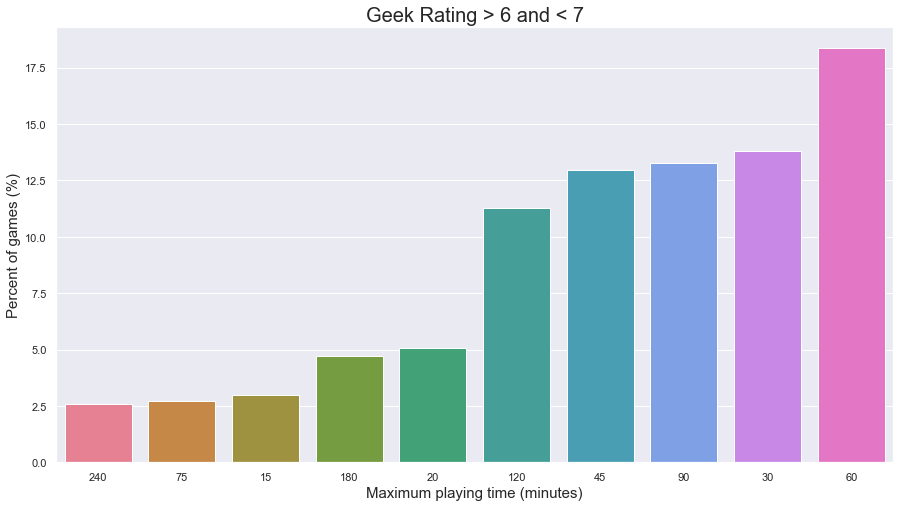

In [54]:
maxplaytime_6_7 = maxplaytime_df.loc[maxplaytime_df["geek_rating_category"] == "Geek rating > 6 and < 7"]\
                     .sort_values(by="No. of games")

maxplaytime_6_7["percent_of_games"] = (maxplaytime_6_7["No. of games"]/sum(maxplaytime_6_7["No. of games"]))*100
maxplaytime_6_7 = maxplaytime_6_7.tail(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "maxplaytime", y = "percent_of_games", data = maxplaytime_6_7, order=maxplaytime_6_7\
            .sort_values("percent_of_games").maxplaytime, palette= "husl")

plt.xlabel("Maximum playing time (minutes)", fontsize = 15)
plt.ylabel("Percent of games (%)", fontsize = 15)
plt.title("Geek Rating > 6 and < 7", fontsize = 20)

Text(0.5, 1.0, 'Geek Rating > 7')

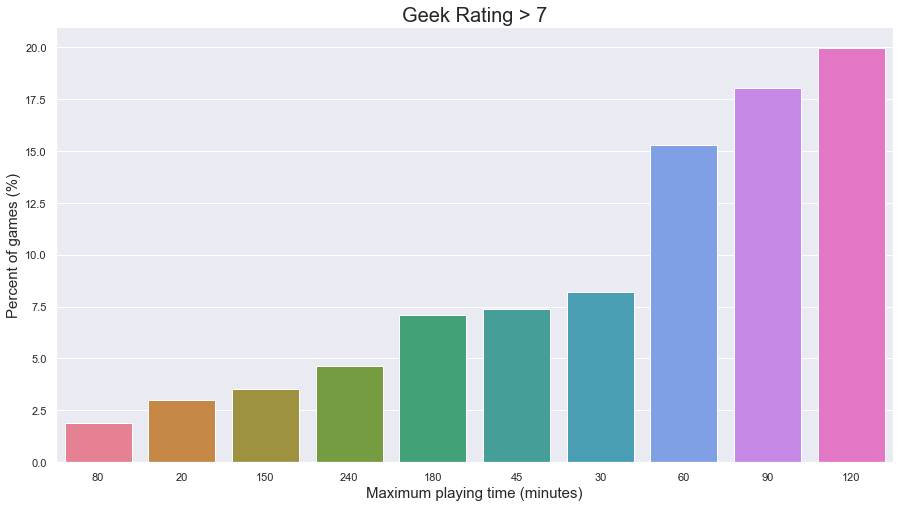

In [55]:
maxplaytime_7 = maxplaytime_df.loc[maxplaytime_df["geek_rating_category"] == "Geek rating > 7"]\
                     .sort_values(by="No. of games")
maxplaytime_7["percent_of_games"] = (maxplaytime_7["No. of games"]/sum(maxplaytime_7["No. of games"]))*100
maxplaytime_7 = maxplaytime_7.tail(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "maxplaytime", y = "percent_of_games", data = maxplaytime_7, order=maxplaytime_7\
            .sort_values("percent_of_games").maxplaytime, palette= "husl")

plt.xlabel("Maximum playing time (minutes)", fontsize = 15)
plt.ylabel("Percent of games (%)", fontsize = 15)
plt.title("Geek Rating > 7", fontsize = 20)

###########################################################################################################################

## Evaluating game counts per board game categories per rating category:

- Categories for each game are separated out from one string for each game to separate strings/dataframe rows:

In [56]:
categories_df = brdg_df[["name","geek_rating_category","geek_rating","boardgamecategory"]]

In [57]:
index=0
category_list = []
for item in categories_df.boardgamecategory:
    item2 = item.replace("'", "").replace("[", "").replace("]", "").split(", ")
    category_list.extend(map(lambda x: [index, x], item2))
    index += 1
# category_list

- Creating separate dataframe for just genres for each game and their indexes:

In [58]:
categorydf_sep = pd.DataFrame(category_list, columns = ["index", "game_genre"])
# categorydf_sep.head(30) 

- Merging the genres table with the original dataframe:

In [59]:
genre_df = pd.merge(categories_df.drop("boardgamecategory", axis = 1), categorydf_sep\
         , how = "right", left_index = True, right_on = "index")

In [60]:
genre_df = genre_df.loc[genre_df.geek_rating > 0,:].reset_index()

In [61]:
genre_df = genre_df.drop("level_0", axis = 1).drop("index", axis = 1)

In [62]:
# genre_df

- Showing average geek ratings for each category for game genres with highest count of games:

In [63]:
mean_rating_df = genre_df.groupby(["geek_rating_category","game_genre"])\
                              .agg({"geek_rating": "mean", "name": "count"})\
                              .sort_values(by=["geek_rating_category", "name", "geek_rating"],\
                              ascending=[False, False, False])
mean_rating_df.rename(columns={"geek_rating": "average geek ratings", "name": "count of games"}, inplace=True)
mean_rating_df

average geek ratings  count of games
geek_rating_category game_genre                                           
Geek rating > 7      Economic                     7.417488              99
                     Card Game                    7.290004              79
                     Fantasy                      7.358690              76
                     Fighting                     7.344650              68
                     Science Fiction              7.405776              54
...                                                    ...             ...
Geek rating < 5      Farming                      4.707330               1
                     Nautical                     4.689710               1
                     Wargame                      4.689710               1
                     Bluffing                     4.577540               1
                     Medical                      4.487860               1

[527 rows x 2 columns]

- Showing top 10 games genres in each rating category based on game count:

In [64]:
mean_rating_df = mean_rating_df.groupby(["geek_rating_category"]).head(10)
mean_rating_df

average geek ratings  \
geek_rating_category    game_genre                                        
Geek rating > 7         Economic                               7.417488   
                        Card Game                              7.290004   
                        Fantasy                                7.358690   
                        Fighting                               7.344650   
                        Science Fiction                        7.405776   
                        Adventure                              7.389769   
                        Medieval                               7.346649   
                        City Building                          7.346441   
                        Miniatures                             7.420659   
                        Civilization                           7.438865   
Geek rating > 6 and < 7 Card Game                              6.359177   
                        Fantasy                                6.388011   
                        Economic                               6.399281   
                        Fighting                               6.418564   
                        Wargame                                6.329406   
                        Science Fiction                        6.395504   
                        Medieval                               6.394772   
                        Exploration                            6.397521   
                        Dice                                   6.364013   
                        Miniatures                             6.370831   
Geek rating > 5 and < 6 Card Game                              5.576675   
                        Wargame                                5.592381   
                        Fantasy                                5.600391   
                        Party Game                             5.547349   
                        Dice                                   5.568099   
                        Childrens Game                         5.523272   
                        Abstract Strategy                      5.569640   
                        Fighting                               5.601998   
                        Science Fiction                        5.591437   
                        World War II                           5.600515   
Geek rating < 5         Childrens Game                         4.523029   
                        Action / Dexterity                     4.717487   
                        Animals                                4.543303   
                        Card Game                              4.642843   
                        Economic                               4.679232   
                        Party Game                             4.606684   
                        Dice                                   4.439832   
                        Deduction                              4.799405   
                        Racing                                 4.431348   
                        Movies / TV / Radio theme              4.274012   

                                                   count of games  
geek_rating_category    game_genre                                 
Geek rating > 7         Economic                               99  
                        Card Game                              79  
                        Fantasy                                76  
                        Fighting                               68  
                        Science Fiction                        54  
                        Adventure                              47  
                        Medieval                               41  
                        City Building                          37  
                        Miniatures                             36  
                        Civilization                           33  
Geek rating > 6 and < 7 Card Game                             556  
                